# Statistics for Data Science with Python

## Project Case Scenario

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.
* Is there a significant difference in the median value of houses bounded by the Charles river or not?
* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston_df: pd.DataFrame = pd.read_csv('week_7_boston_housing.csv')
boston_df.drop(columns={'Unnamed: 0'}, inplace=True)

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Comment 1**

The mean of the median value of owner-occupied homes about (22.5k USD). This is slightly higher than the median of median value of owner-occupied homes (21.2k USD). The difference could be explained by a cluster of homes that are valued in excess of 40k USD (see Fig 1), which would result in a positive skew in averages.

In [6]:
print(f"median value of owner-occupied homes = {boston_df.MEDV.median()}k USD")
print(f"mean value of owner-occupied homes = {boston_df.MEDV.mean()}k USD")

median value of owner-occupied homes = 21.2k USD
mean value of owner-occupied homes = 22.532806324110677k USD


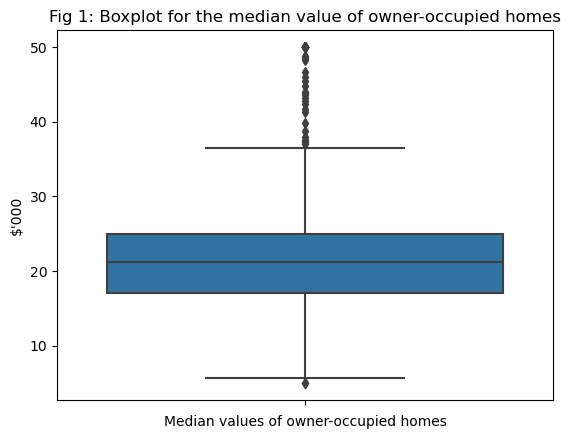

In [7]:
ax = sns.boxplot(data=boston_df,y='MEDV')
plt.title("Fig 1: Boxplot for the median value of owner-occupied homes")
plt.ylabel("$'000")
plt.xlabel('Median values of owner-occupied homes')
plt.show()

## Question: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

We compare the value of homes that bound the Charles river with homes that do not bound the Charles river. 

In Fig 2, it appears that the median of median value of homes bounding the river (23.3k USD) are 2.4k USD higher than homes which do not bound the river (20.9k USD).

Even if we compare mean prices, as in Fig 3, we can see that the average prices of homes that bound the river are higher than those that do not.

In [8]:
# creating river dummies
boston_df.loc[(boston_df['CHAS'] == 0), 'river_dummy'] = 'no_river'
boston_df.loc[(boston_df['CHAS'] == 1), 'river_dummy'] = 'bounds_river'

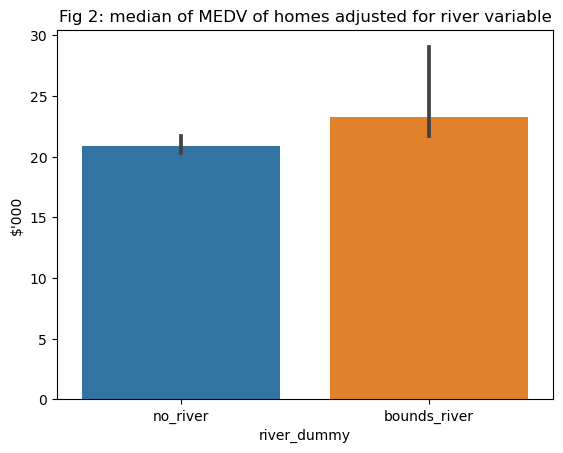

In [9]:
ax = sns.barplot(data=boston_df, x='river_dummy', y='MEDV', estimator='median')
plt.title("Fig 2: median of MEDV of homes adjusted for river variable")
plt.ylabel("$'000")
plt.show()

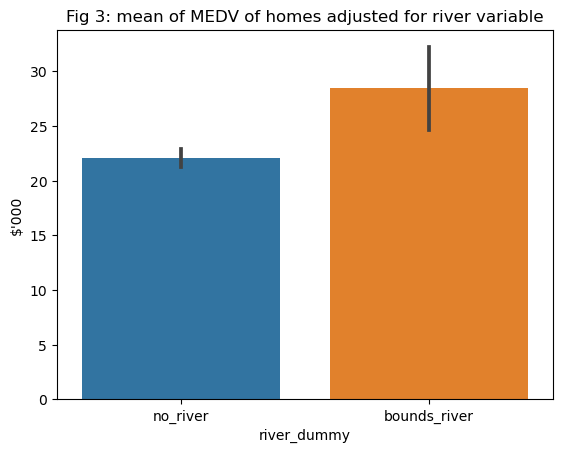

In [10]:
ax = sns.barplot(data=boston_df, x='river_dummy', y='MEDV')
plt.title("Fig 3: mean of MEDV of homes adjusted for river variable")
plt.ylabel("$'000")
plt.show()

### Hypothesis 1

We use the t-test to compare the difference in means (note: not medians, as in the observation above).

$H\_0$: there is no significant difference in median value of houses bounded by the Charles river

$H\_1$: there is a significant difference in median value of houses bounded by the Charles river


**Perform t-test**

In [11]:
X = pd.get_dummies(boston_df[['CHAS']])
X = sm.add_constant(X) 

y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           7.39e-05
Time:                        15:30:04   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**

Based on the t-test, we find that, on average, the median value of a home bounded by a river is 6.35k USD than a home not bounded by the river.
We get a p value of 0.00. Since 0.00 < $α$ = 0.05, we reject the hypothesis that there is no significant difference in the median values of houses bounded by the Charles river. We therefore conclude that there is a significant difference in the median value of houses bounded by the Charles river.

## Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

From the visualisation of median value of homes adjusted by age (Fig 4), it would appear that the younger the age of a home, the higher its median value. 

However we note that although homes aged 70 years and older have the lowest median values, we note that there are a number of outliers where homes are valued in the 30k-50k USD range, which could suggest a positive skew in the average price home homes that are older than 70 years.


In [12]:
# creating age dummies
boston_df.loc[(boston_df['AGE'] <= 35), 'age_dummy'] = 'a. 35 years and younger'
boston_df.loc[((boston_df['AGE'] > 35)&(boston_df['AGE'] <70)), 'age_dummy'] = 'b. between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_dummy'] = 'c. 70 years and older'

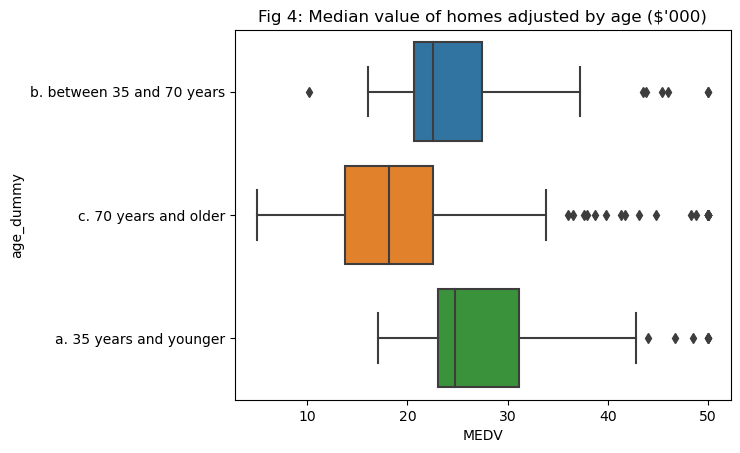

In [13]:
ax = sns.boxplot(boston_df,x='MEDV',y=boston_df['age_dummy'])
plt.title("Fig 4: Median value of homes adjusted by age ($'000)")
plt.show()

### Hypothesis 2

We use ANOVA to compare the difference in averages between more than 2 groups.

$H\_0$: There is no difference in Median values of houses (MEDV) for homes aged (a) <35, (b) between 35 and 70, and (c) >70. 

$H\_1$: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [14]:
lm = ols('MEDV ~ age_dummy', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_dummy    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [15]:
X = pd.get_dummies(boston_df[['age_dummy']])
X = sm.add_constant(X) 

y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.71e-15
Time:                        15:30:18   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   18.1292      0.321     56.399      0.000      17.498      18.761
age_dummy_a. 35 years and younger        9.6466      0.715     13.496      0.000       8.242      11.051
age_dummy_b. between 35 and 70 years     6.8184      0.627     10.875      0.000       5.587       8.050
age_dummy_c. 70 years and older          1.6642      0.482      3.451      0.001       0.717       2.612
==============================================================================
Omnibus:                      158.454   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.356
Skew:                           1.592   Prob(JB):                     3.84e-86
Kurtosis:                       5.919   Cond. No.                     1.94e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Conclusion**

We get a p value of 0.0171, which is < $α$ = 0.05. We therefore reject the hypothesis that there is no difference in the median value of houses for each proportion of owner occupied units aged (a) <35, (b) between 35 and 70, and (c) >70. We conclude therefore that there is a difference in the median values of houses for each proportion of owner occupied units built prior to 1940.

## Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

There appears to be a positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town, up to 15% (Fig 5).

However there appears to be a group of towns which have a proportion of non-retail business acres per town of 18.1% (Fig 6). 

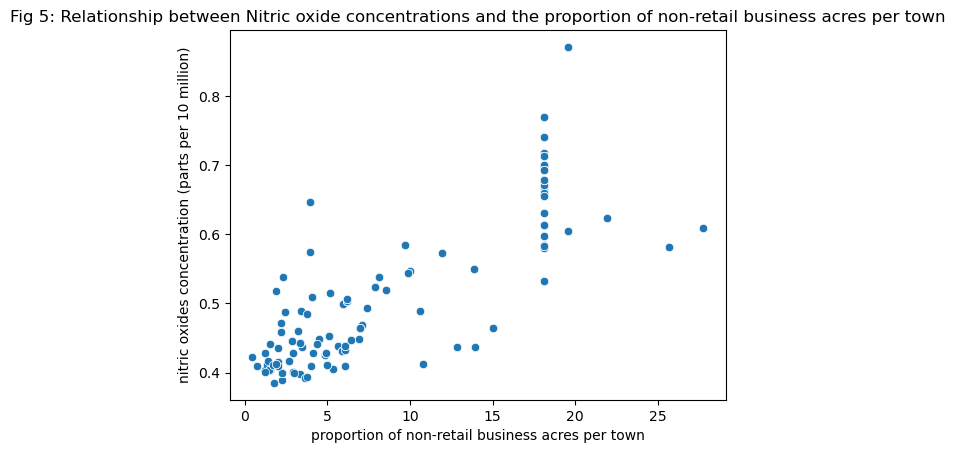

In [16]:
ax = sns.scatterplot(boston_df, x='INDUS', y='NOX')
plt.title("Fig 5: Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.ylabel("nitric oxides concentration (parts per 10 million)")
plt.xlabel("proportion of non-retail business acres per town")
plt.show()

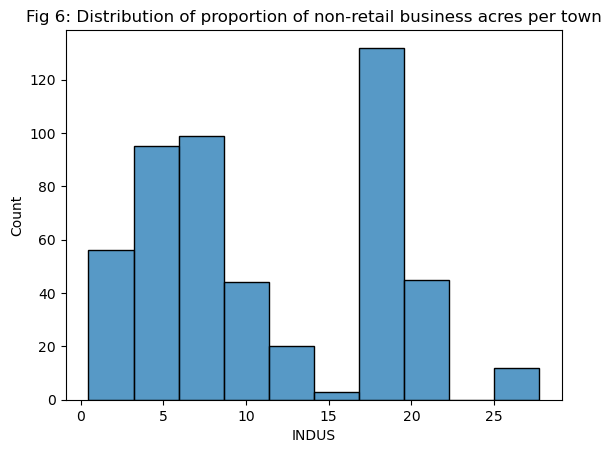

In [17]:
ax = sns.histplot(boston_df['INDUS'])
plt.title("Fig 6: Distribution of proportion of non-retail business acres per town")
plt.show()

### Hypothesis 3

We use Pearson Correlation to check if there is a relationship between NOX and INDUS.

$H\_0$: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town 

$H\_1$: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [18]:
## X is the input variables (or independent variables)
X = boston_df['INDUS']
## y is the target/dependent variable
y = boston_df['NOX']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           7.91e-98
Time:                        15:30:36   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**

We find that R^2 is 0.58, which means that there is a covariance of 0.76. This suggests that there is a positive linear relationship between NOX and INDUS.

We derive a P value of 0.079, which is > $α$ = 0.05.

Therefore, based on a significance level of 5%, we reject $H\_0$ that there is no relationship between NOX and INDUS.

## Question: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) - log transform and take the coefficient

We use regression analysis to calculate the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Based on the coefficient, we find that on average, when a home's weighted distance to the five Boston employment centres increases by 1%, the median value of owner occupied homes tend to be 4% higher than expected.

In [19]:
## X is the input variables (or independent variables)
X = np.log(boston_df['DIS'])
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.00e-11
Time:                        15:30:47   Log-Likelihood:                -1817.6
No. Observations:                 506   AIC:                             3639.
Df Residuals:                     504   BIC:                             3648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6131      0.947     17.537      0.000      14.752      18.474
DIS            4.9828      0.726      6.862      0.000       3.556       6.409
==============================================================================
Omnibus:                      161.692   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.821
Skew:                           1.620   Prob(JB):                     4.57e-89
Kurtosis:                       5.967   Cond. No.                         4.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Additional visualisation

Task 4: Create a histogram for the pupil to teacher ratio variable

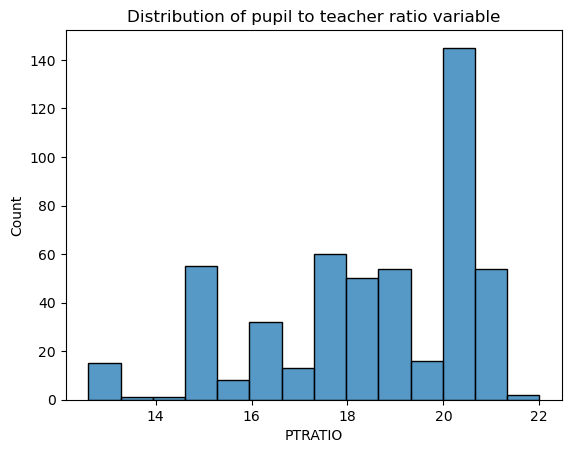

In [20]:
ax = sns.histplot(boston_df['PTRATIO'])
plt.title("Distribution of pupil to teacher ratio variable")
plt.show()